# Load the required packages

In [1]:
import time
import pickle
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from da import update_lib, add_msp_MZmine, gen_datasets
from GCMSformer import train_model, plot_loss, evaluate_model

# Add new compounds and update Library

In [4]:
lib_path_pk = 'Library/Library.pk'
lib_path_msp = 'Library/spectra.msp'
added_path_msp = 'Library/added_compounds.msp'
new_lib_path_pk = 'Library/New_Library.pk'

# Expand Library
update_lib(lib_path_pk, added_path_msp, new_lib_path_pk)
add_msp_MZmine(lib_path_msp, added_path_msp)

The new library has been successfully saved as a Pickle file


# View the Library before and after the update

In [5]:
# Before update
with open(lib_path_pk, 'rb') as file1:
     old_lib = pickle.load(file1)

for i, item in enumerate(old_lib.items()):
        print(f'>>>NO.{i+1}<<<', item, '\n')

>>>NO.1<<< ('Heptane', {'ms': {'m/z': [29, 30, 37, 38, 39, 40, 41, 42, 43, 44, 50, 51, 52, 53, 54, 55, 56, 57, 58, 63, 65, 67, 69, 70, 71, 72, 73, 77, 84, 85, 86, 100, 101], 'intensity': [58429.473, 1349.0, 399.54993, 1491.0, 35103.203, 6852.6953, 175134.47, 71666.45, 352857.0, 12419.179, 1226.0, 2506.0, 941.0, 6943.0, 2532.0, 49498.0, 141351.94, 225482.58, 9992.0, 561.0, 994.0, 1410.0, 3635.4585, 144404.0, 284362.56, 15996.0, 389.82407, 407.0, 1526.7098, 14548.352, 1225.3483, 112486.04, 8815.566]}}) 

>>>NO.2<<< ('3-Methoxy-3-methylbutanol', {'ms': {'m/z': [29, 30, 31, 33, 38, 39, 40, 41, 42, 43, 44, 45, 46, 50, 51, 53, 54, 55, 56, 57, 58, 59, 61, 63, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 85, 86, 87, 101, 103, 104], 'intensity': [14216.0, 732.0, 13948.0, 18785.0, 780.1876, 13509.705, 3227.0288, 56826.062, 9757.435, 56768.0, 2556.0, 18282.506, 449.93713, 625.0, 1242.0, 17692.912, 1357.8187, 26263.773, 18366.969, 19991.021, 1671.0846, 8276.045, 974.3142, 604.93494, 805.02466, 4864.0, 

In [6]:
# After update
with open(new_lib_path_pk, 'rb') as file2:
     new_lib = pickle.load(file2)

for i, item in enumerate(new_lib.items()):
        print(f'>>>NO.{i+1}<<<', item, '\n')

>>>NO.1<<< ('Heptane', {'ms': {'m/z': [29, 30, 37, 38, 39, 40, 41, 42, 43, 44, 50, 51, 52, 53, 54, 55, 56, 57, 58, 63, 65, 67, 69, 70, 71, 72, 73, 77, 84, 85, 86, 100, 101], 'intensity': [58429.473, 1349.0, 399.54993, 1491.0, 35103.203, 6852.6953, 175134.47, 71666.45, 352857.0, 12419.179, 1226.0, 2506.0, 941.0, 6943.0, 2532.0, 49498.0, 141351.94, 225482.58, 9992.0, 561.0, 994.0, 1410.0, 3635.4585, 144404.0, 284362.56, 15996.0, 389.82407, 407.0, 1526.7098, 14548.352, 1225.3483, 112486.04, 8815.566]}}) 

>>>NO.2<<< ('3-Methoxy-3-methylbutanol', {'ms': {'m/z': [29, 30, 31, 33, 38, 39, 40, 41, 42, 43, 44, 45, 46, 50, 51, 53, 54, 55, 56, 57, 58, 59, 61, 63, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 85, 86, 87, 101, 103, 104], 'intensity': [14216.0, 732.0, 13948.0, 18785.0, 780.1876, 13509.705, 3227.0288, 56826.062, 9757.435, 56768.0, 2556.0, 18282.506, 449.93713, 625.0, 1242.0, 17692.912, 1357.8187, 26263.773, 18366.969, 19991.021, 1671.0846, 8276.045, 974.3142, 604.93494, 805.02466, 4864.0, 

# Retrain GCMSFormer after updating the Library

Generating Dataset: 100%|██████████| 100000/100000 [04:28<00:00, 372.67it/s]


| epoch   1 |  1000/ 4000 batches | s/batch  0.06 | loss  1.13 | ppl     3.11
| epoch   1 |  2000/ 4000 batches | s/batch  0.06 | loss  0.32 | ppl     1.38
| epoch   1 |  3000/ 4000 batches | s/batch  0.06 | loss  0.19 | ppl     1.21
-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 271.10s | train loss  0.45 | valid loss  0.10 | valid ppl  1.10
-----------------------------------------------------------------------------------------
| epoch   2 |  1000/ 4000 batches | s/batch  0.06 | loss  0.11 | ppl     1.12
| epoch   2 |  2000/ 4000 batches | s/batch  0.06 | loss  0.10 | ppl     1.11
| epoch   2 |  3000/ 4000 batches | s/batch  0.06 | loss  0.09 | ppl     1.10
-----------------------------------------------------------------------------------------
| end of epoch   2 | time: 273.45s | train loss  0.10 | valid loss  0.06 | valid ppl  1.06
--------------------------------------------------------------------------------

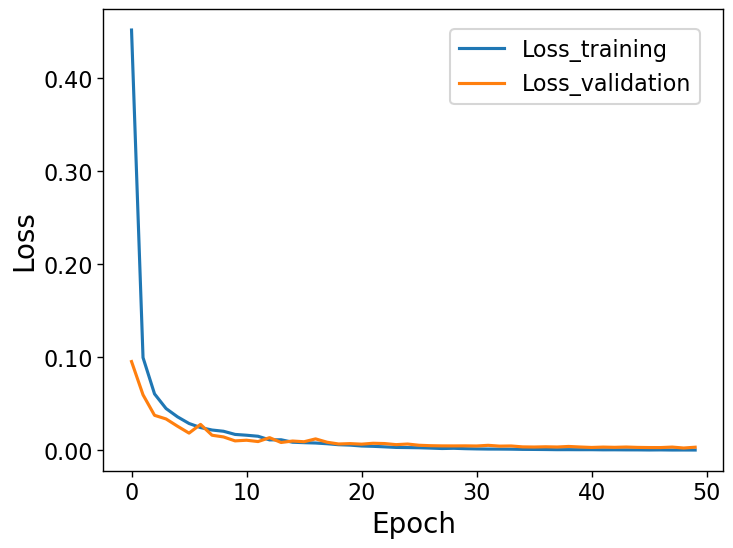

In [15]:
model_path='C:/Users/54964/Desktop/gcmsformer_test/Model_and_loss'
model_name='GCMSFormer_retrain'
loss_name='loss_retrain'

para = {
        'name': 'Library/spectra.msp',
        'mz_range': (1,1000),
        'aug_num': 100000,
        'layer_num': 3,
        'batch_size': 20,
        'epochs': 50,
        'lr': 0.0001,
        'head': 8,
        'model_path': model_path,
        'model_name': model_name,
        'loss_name': loss_name}

TRAIN, VALID, TEST, tgt_vocab = gen_datasets(para)
t1 = time.time()
model, loss = train_model(para, TRAIN, VALID, tgt_vocab)
t = time.time() - t1
plot_loss(loss)

# Test model
score_val = evaluate_model(model,VALID,tgt_vocab,int(max(para['mz_range'])))
score_test = evaluate_model(model,TEST,tgt_vocab,int(max(para['mz_range'])))

In [16]:
print(f'BLEU value on the validation set is {score_val}')
print(f'BLEU value on the test set is {score_test}')
print(f'The time it takes to retrain the model is {t}')

BLEU value on the validation set is 0.9978126856093453
BLEU value on the test set is 0.9979176397645959
The time it takes to retrain the model is 14572.651462316513


# Save new tgt_vocab

In [17]:
# Save new tgt_vocab
new_tgt_vocab_pk = 'Library/new_tgt_vocab.pk'
with open(lib_path_pk, 'wb') as file:
     pickle.dump(tgt_vocab, file, protocol=pickle.HIGHEST_PROTOCOL)